In [48]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def random_walk(G, initial_vertex, N):
    """
    Simula una camminata casuale su un grafo.

    :param G: Grafo come oggetto NetworkX
    :param initial_vertex: Vertice iniziale
    :param N: Numero di passi
    :return: Traiettoria della camminata casuale
    """
    # Inizializza la traiettoria con il vertice iniziale
    trajectory = [initial_vertex]
    current_vertex = initial_vertex
    
    for _ in range(N):
        # Ottieni i vicini del vertice corrente
        neighbors = list(G.neighbors(current_vertex))
        
        # Scegli un vicino a caso
        next_vertex = random.choice(neighbors)
        
        # Aggiungi il prossimo vertice alla traiettoria
        trajectory.append(next_vertex)
        
        # Aggiorna il vertice corrente
        current_vertex = next_vertex

    return trajectory


In [3]:
# Esempio di utilizzo
# Crea un grafo
G = nx.erdos_renyi_graph(10, 0.5)  # Grafo casuale con 10 vertici e probabilità 0.5 di collegamento
initial_vertex = random.choice(list(G.nodes))  # Scegli un vertice iniziale a caso
N = 15  # Numero di passi

# Simula la camminata casuale
trajectory = random_walk(G, initial_vertex, N)

print(f"Traiettoria della camminata casuale a partire dal vertice {initial_vertex}: {trajectory}")

Traiettoria della camminata casuale a partire dal vertice 6: [6, 1, 9, 0, 5, 2, 7, 4, 6, 4, 6, 3, 1, 6, 1, 9]


In [31]:
def random_walk_cover_time(G, num_trials=100):
    """
    Simula la copertura del tempo su un grafo.

    :param G: Grafo come oggetto NetworkX
    :param num_trials: Numero di simulazioni per ogni vertice iniziale
    :return: Tempo di copertura stimato
    """
    def single_random_walk(start_vertex):
        visited = set()
        current_vertex = start_vertex
        steps = 0
        
        while len(visited) < len(G.nodes):
            visited.add(current_vertex)
            neighbors = list(G.neighbors(current_vertex))
            current_vertex = random.choice(neighbors)
            steps += 1

        # Verifica se tutti i nodi sono stati visitati
        assert visited == set(G.nodes), f"Non tutti i nodi sono stati visitati: {visited}"
        
        return steps
    
    cover_times = defaultdict(list)
    
    for start_vertex in G.nodes:
        for _ in range(num_trials):
            steps = single_random_walk(start_vertex)
            cover_times[start_vertex].append(steps)
    
    max_expected_cover_time = max(sum(times) / num_trials for times in cover_times.values())
    return max_expected_cover_time

In [33]:
def parallel_random_walk_cover_time(G, k, num_trials=100):
    """
    Simula la copertura del tempo su un grafo con k camminate casuali parallele.

    :param G: Grafo come oggetto NetworkX
    :param k: Numero di camminate casuali parallele
    :param num_trials: Numero di simulazioni per ogni vertice iniziale
    :return: Tempo di copertura stimato per k camminate parallele
    """
    def single_parallel_random_walk(start_vertex, k):
        visited = set()
        positions = [start_vertex] * k  # Inizializza tutte le camminate al vertice di partenza
        steps = 0
        
        while len(visited) < len(G.nodes):
            for i in range(k):
                neighbors = list(G.neighbors(positions[i]))
                positions[i] = random.choice(neighbors)
                visited.add(positions[i])
            steps += 1
        
        # Verifica se tutti i nodi sono stati visitati
        assert visited == set(G.nodes), f"Non tutti i nodi sono stati visitati: {visited}"
        
        return steps
    
    cover_times = defaultdict(list)
    
    for start_vertex in G.nodes:
        for _ in range(num_trials):
            steps = single_parallel_random_walk(start_vertex, k)
            cover_times[start_vertex].append(steps)
    
    max_expected_cover_time = max(sum(times) / num_trials for times in cover_times.values())
    return max_expected_cover_time

In [47]:
# Esempio di utilizzo
# Crea un grafo
G = nx.erdos_renyi_graph(10, 0.5)  # Grafo casuale con 10 vertici e probabilità 0.5 di collegamento

# Stima il tempo di copertura per una singola camminata
estimated_cover_time = random_walk_cover_time(G, num_trials=100)
print(f"Tempo di copertura stimato per una singola camminata: {estimated_cover_time}")

# Numero di camminate casuali parallele
k = 3

# Stima il tempo di copertura con k camminate parallele
estimated_parallel_cover_time = parallel_random_walk_cover_time(G, k, num_trials=100)
print(f"Tempo di copertura stimato per {k} camminate parallele: {estimated_parallel_cover_time}")

Tempo di copertura stimato per una singola camminata: 33.66
Tempo di copertura stimato per 3 camminate parallele: 11.98


In [56]:
# Simula e raccogli i dati
n_values = [10 * alpha for alpha in range(1, 21)]
single_cover_times = []
parallel_cover_times = []

num_trials = 100

for n in n_values:
    G = nx.complete_graph(n)
    single_cover_time = random_walk_cover_time(G, num_trials)
    parallel_cover_time = parallel_random_walk_cover_time(G, n, num_trials)
    single_cover_times.append(single_cover_time)
    parallel_cover_times.append(parallel_cover_time)
    print(f"n={n}: Single cover time = {single_cover_time}, Parallel cover time = {parallel_cover_time}")


n=10: Single cover time = 28.29, Parallel cover time = 3.33
n=20: Single cover time = 71.99, Parallel cover time = 4.19
n=30: Single cover time = 121.15, Parallel cover time = 4.67
n=40: Single cover time = 173.88, Parallel cover time = 4.95
n=50: Single cover time = 232.33, Parallel cover time = 5.25
n=60: Single cover time = 290.81, Parallel cover time = 5.54
n=70: Single cover time = 355.88, Parallel cover time = 5.55
n=80: Single cover time = 415.87, Parallel cover time = 5.8
n=90: Single cover time = 473.91, Parallel cover time = 6.05
n=100: Single cover time = 550.04, Parallel cover time = 6.0
n=110: Single cover time = 613.56, Parallel cover time = 6.06
n=120: Single cover time = 673.42, Parallel cover time = 6.15
n=130: Single cover time = 755.56, Parallel cover time = 6.25
n=140: Single cover time = 814.8, Parallel cover time = 6.28
n=150: Single cover time = 884.09, Parallel cover time = 6.42
n=160: Single cover time = 962.65, Parallel cover time = 6.46
n=170: Single cover ti

In [57]:
c_single = np.mean([single_cover_time / (n * np.log(n)) for single_cover_time, n in zip(single_cover_times, n_values)])
c_parallel = np.mean([parallel_cover_time / np.log(n) for parallel_cover_time, n in zip(parallel_cover_times, n_values)])

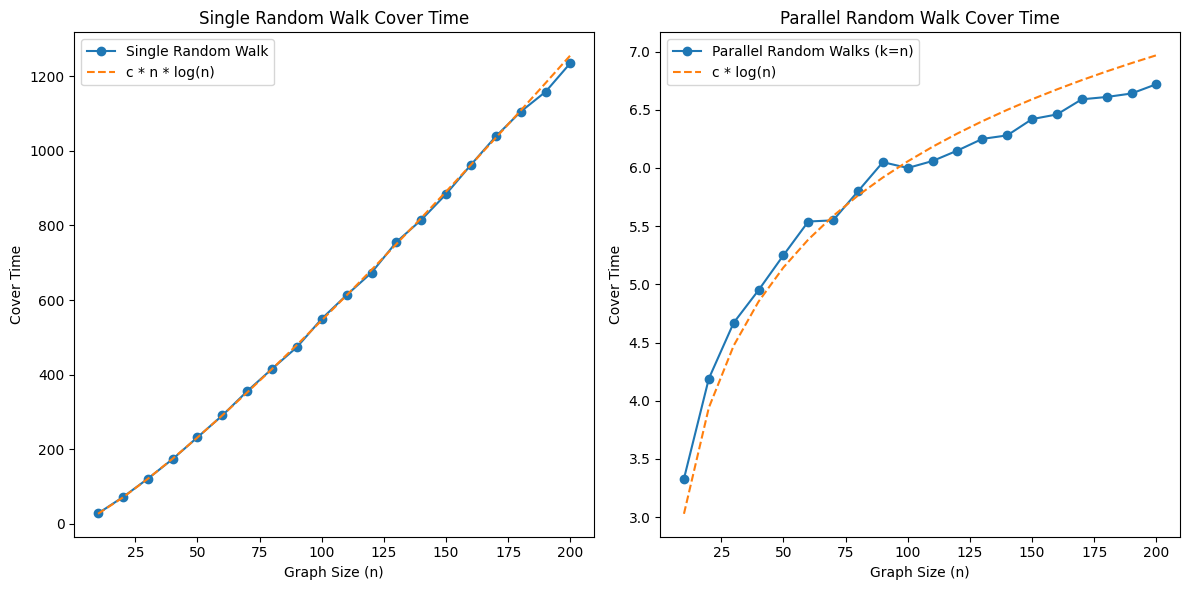

In [58]:
# Genera i grafici
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, single_cover_times, label="Single Random Walk", marker='o')
plt.plot(n_values, [c_single * n * np.log(n) for n in n_values], linestyle='--', label="c * n * log(n)")
plt.xlabel("Graph Size (n)")
plt.ylabel("Cover Time")
plt.title("Single Random Walk Cover Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_values, parallel_cover_times, label="Parallel Random Walks (k=n)", marker='o')
plt.plot(n_values, [c_parallel * np.log(n) for n in n_values], linestyle='--', label="c * log(n)")
plt.xlabel("Graph Size (n)")
plt.ylabel("Cover Time")
plt.title("Parallel Random Walk Cover Time")
plt.legend()

plt.tight_layout()
plt.show()